A random forest consists of multiple decision trees (=estimators). Each decision tree is trained on different batch of data. Each tree makes a prediction on the query. The output of the random forrest is the majority vote of all its estimators. A random forest belongs to the class of ensemble learners.

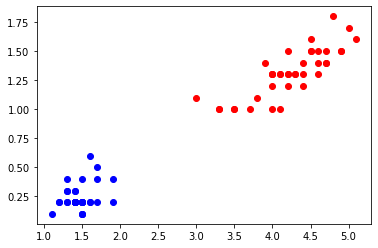

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

# creating our own random data set
#X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# data set is the iris dataset from https://www.kaggle.com/arshid/iris-flower-dataset
# we are only keeping features "petal_length" and "petal_width"
df = pd.read_csv("data/iris.csv").drop(["sepal_width", "sepal_length"], 1) 

# convert labels to numbers
label_mappings = {label_str:i for i,label_str in enumerate(df["species"].unique())}
df.replace({"species":label_mappings}, inplace=True)

X = np.array(df.drop(["species"], 1))
y = np.array(df["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X_train[:,0][y_train==0], X_train[:,1][y_train==0], color="b")
plt.scatter(X_train[:,0][y_train==1], X_train[:,1][y_train==1], color="r")

plt.show()

In [5]:
clf = RandomForestClassifier(n_estimators=10, random_state=42) # 10 estimators
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 1.0
